# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [1]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [2]:
def answer_one():
    
    data = pd.read_csv('fraud_data.csv')
    
    return len( data[data.Class == 1]) / len(data)

answer_one()

0.016410823768035772

In [3]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [8]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    from sklearn.metrics import confusion_matrix
    
    dummy_most_freq = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
    y_dummy_prediction = dummy_most_freq.predict(X_test)
     
    confusion = confusion_matrix(y_test, y_dummy_prediction)   #confusion_matrix(y_true, y_predicted)
    print('Most frequent class (dummy classifier)\n', confusion, '\n')
    
    acc = dummy_most_freq.score(X_test, y_test)
    print('accuracy: {}'.format(accuracy_score(y_test, y_dummy_prediction)))   #same
    rec = recall_score(y_test, y_dummy_prediction) 
    
    return acc, rec

answer_two()

Most frequent class (dummy classifier)
 [[5344    0]
 [  80    0]] 

accuracy: 0.9852507374631269


(0.9852507374631269, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [43]:
def answer_three():
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    from sklearn.svm import SVC

    svm = SVC().fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    
    # acc = svm.score(X_test, y_test)
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    
    print('accuracy: {}'.format(acc))
    print('recall: {}'.format(rec))
    print('precision: {}'.format(prec))
    
    return acc, rec, prec

answer_three()

D:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy: 0.9907817109144543
recall: 0.375
precision: 1.0


(0.9907817109144543, 0.375, 1.0)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [14]:
# **d means "treat the key-value pairs in the dictionary as additional named arguments to this function call."
def foo(x, y):
    print(x, y)

d = {'x':1, 'y':2}
foo(**d)

1 2


In [45]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    threshold = -220.0

    y_svc_pred = SVC(C=1e9, gamma=1e-07).fit(X_train, y_train).predict(X_test)
    confusion = confusion_matrix(y_test, y_svc_pred)
    print('SVC (threshold = 0)\n', confusion, '\n')

    params = {'C': 1e9, 'gamma': 1e-07}
    y_score = SVC(**params).fit(X_train, y_train).decision_function(X_test)
    # y_score = SVC(C=1e9, gamma=1e-07).fit(X_train, y_train).decision_function(X_test)   #same
    y_prediction_threshold = np.zeros_like(y_score)   #give a array of zero with same shape as y_score
    y_prediction_threshold[np.where(y_score >= threshold)] = 1

    # print(y_prediction_threshold.tolist())

    confustion_threshold = confusion_matrix(y_test, y_prediction_threshold)
    print('SVC (threshold = -220)\n', confustion_threshold, '\n')
    
    return confustion_threshold

answer_four()

SVC (threshold = 0)
 [[5340    4]
 [  16   64]] 

SVC (threshold = -220)
 [[5320   24]
 [  14   66]] 



array([[5320,   24],
       [  14,   66]], dtype=int64)

### Question 5

Train a logistic regression classifier with default parameters using X_train and y_train.

For the logistic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc

prec = 0.75
fpr_min = 0.159
fpr_max = 0.161

lr = LogisticRegression()
y_scores = lr.fit(X_train, y_train).decision_function(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_scores)

roc_auc_lr = auc(fpr_lr, tpr_lr)

rec = float(recall[np.where(precision==prec)])
tpr = float(tpr_lr[np.where((fpr_lr >= fpr_min) & (fpr_lr <= fpr_max))][0])

print('AUC = {}'.format(roc_auc_lr))
print('Recall (where precision = 0.75) = {}'.format(rec))
print('TPR (where FPR = 0.16) = {}'.format(tpr))

D:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC = 0.9693441242514971
Recall (where precision = 0.75) = 0.825
TPR (where FPR = 0.16) = 0.9375


<IPython.core.display.Javascript object>


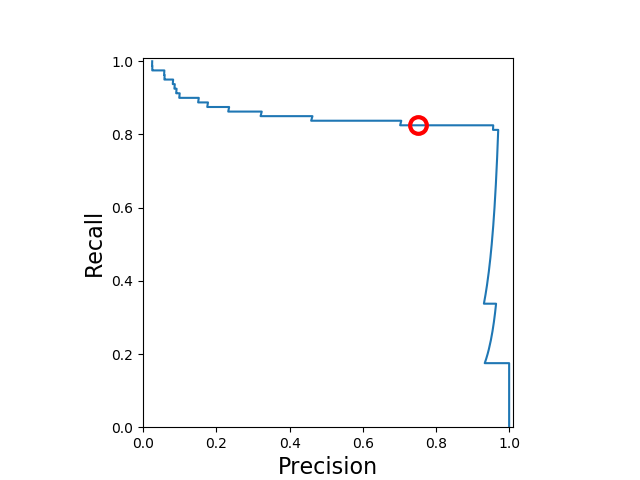

D:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


In [38]:
# precision_recall_curve
%matplotlib notebook
import matplotlib.pyplot as plt

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(prec, rec, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

<IPython.core.display.Javascript object>


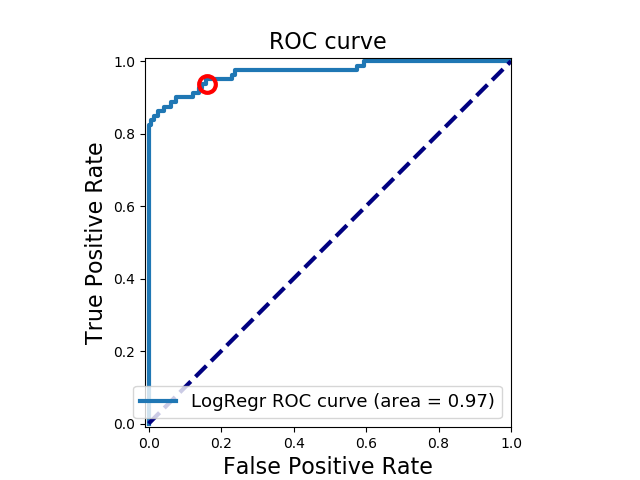

D:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


In [40]:
# roc_curve

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.plot(0.16, tpr, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array.*

In [49]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    pen = ['l1', 'l2']
    C = [0.01, 0.1, 1, 10, 100]
    grid_values = {'penalty': pen, 'C': C}
    
    lr = LogisticRegression()
    grid_lr_recall = GridSearchCV(lr, param_grid = grid_values, scoring='recall').fit(X_train, y_train)
    res = grid_lr_recall.cv_results_['mean_test_score'].reshape(-1, 2)   #mean test scores of each parameter combination
    
    print('Grid best parameter (max. recall): ', grid_lr_recall.best_params_)
    print('Grid best score (recall): ', grid_lr_recall.best_score_)
    
    return res

answer_six()

D:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solve

Grid best parameter (max. recall):  {'C': 10, 'penalty': 'l2'}
Grid best score (recall):  0.8115942028985509


array([[0.66666667, 0.76086957],
       [0.80072464, 0.80434783],
       [0.8115942 , 0.8115942 ],
       [0.80797101, 0.8115942 ],
       [0.80797101, 0.8115942 ]])

D:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solve

Grid best parameter (max. recall):  {'C': 10, 'penalty': 'l2'}
Grid best score (recall):  0.8115942028985509


<IPython.core.display.Javascript object>


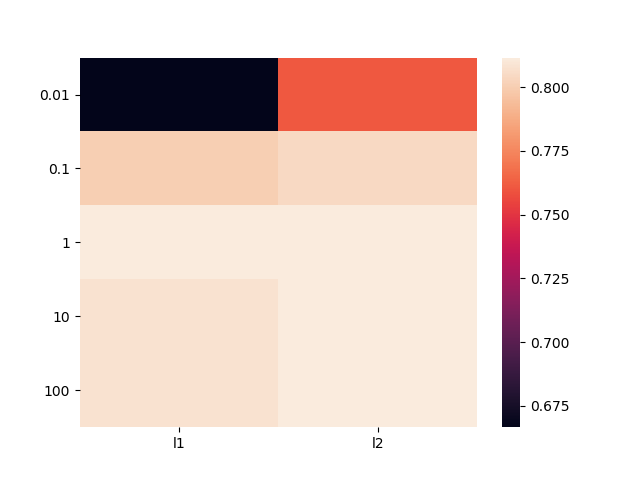

In [47]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())